ML practical: EQ classification

1. id: if of the event
2. hour: hour of day when earthquake occured
3. lat
4. lon
5. mag
6. depth
7. nsta
8. label: 1 --> felt, 0 --> not felt

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import set_option

In [46]:
set_option("display.max_rows", 25)

pd.options.mode.chained_assignment = None

filename = 'jp_eqk_train.csv'
eq_data = pd.read_csv(filename)
eq_data

,id,hour,lat,lon,mag,depth,nsta,label
0,1,7,34.1470,135.1607,3.4,8.6,33,1
1,2,3,31.8363,130.2910,3.1,5.9,25,1
2,3,11,28.0560,130.4255,4.2,26.9,11,1
3,4,12,28.1238,130.3577,4.5,34.8,21,1
4,7,2,35.6165,140.2328,5.0,78.0,40,1
...,...,...,...,...,...,...,...,...
3995,23516,22,36.1320,140.0163,3.3,48.0,35,0
3996,23529,1,37.0158,140.6923,3.5,9.3,20,0
3997,23533,4,36.9553,140.7043,3.3,8.5,20,0
3998,23546,9,37.1232,140.7023,2.9,6.5,20,0


In [47]:
label_colors = ['#F4D03F', '#196F3D']
eq_labels = ['not felt', 'felt']
label_color_map = {}
for ind, label in enumerate(eq_labels):
    label_color_map[label] = label_colors[ind]

def label_felt_not_felt(row, labels):
    ilab = int(row['label'])
    return labels[ilab]

eq_data.loc[:,'eq labels'] = eq_data.apply(lambda row: label_felt_not_felt(row, eq_labels), axis=1)
eq_data

,id,hour,lat,lon,mag,depth,nsta,label,eq labels
0,1,7,34.1470,135.1607,3.4,8.6,33,1,felt
1,2,3,31.8363,130.2910,3.1,5.9,25,1,felt
2,3,11,28.0560,130.4255,4.2,26.9,11,1,felt
3,4,12,28.1238,130.3577,4.5,34.8,21,1,felt
4,7,2,35.6165,140.2328,5.0,78.0,40,1,felt
...,...,...,...,...,...,...,...,...,...
3995,23516,22,36.1320,140.0163,3.3,48.0,35,0,not felt
3996,23529,1,37.0158,140.6923,3.5,9.3,20,0,not felt
3997,23533,4,36.9553,140.7043,3.3,8.5,20,0,not felt
3998,23546,9,37.1232,140.7023,2.9,6.5,20,0,not felt


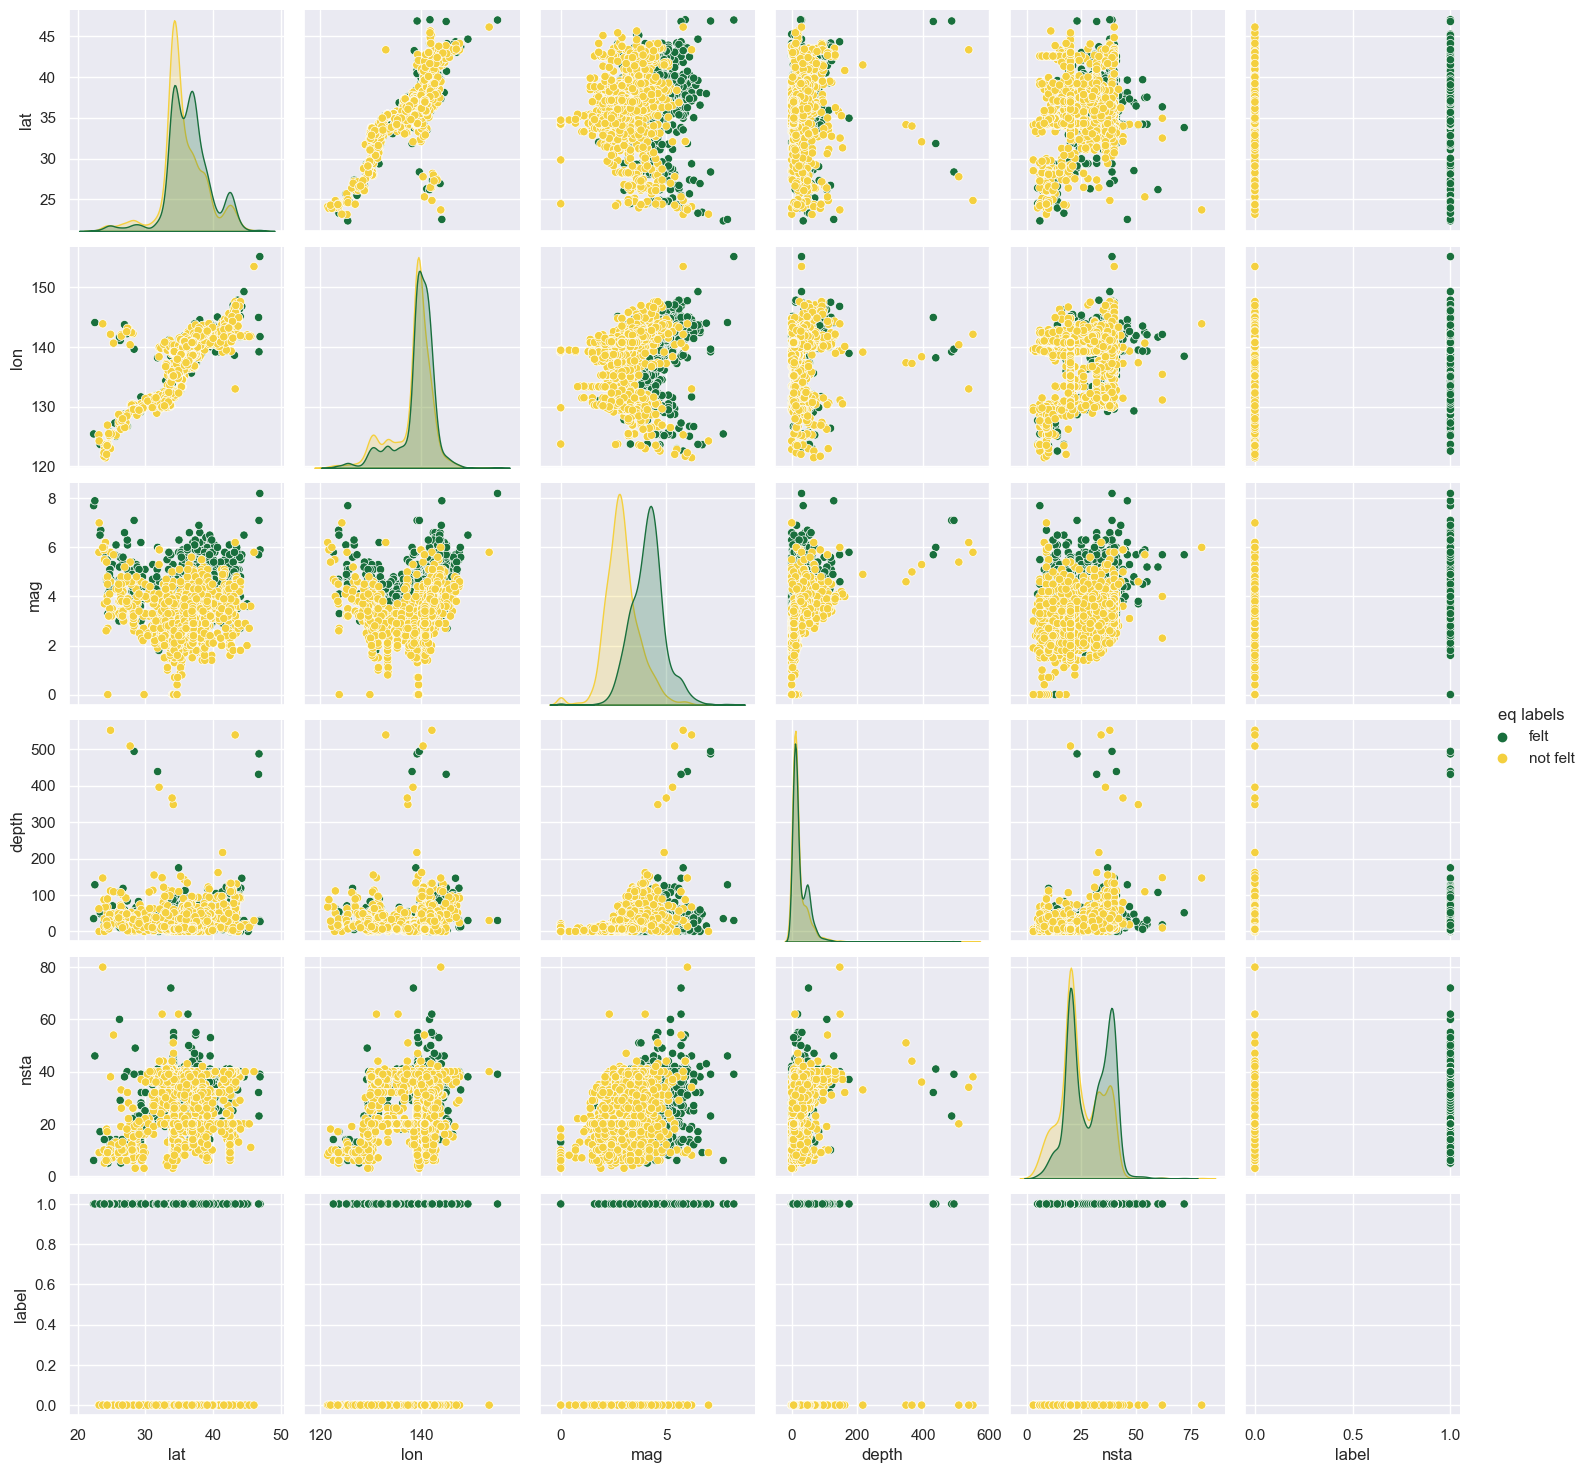

In [48]:
import seaborn as sns
sns.set()
sns.pairplot(eq_data.drop(['id', 'hour'],axis=1),
             hue='eq labels', palette=label_color_map,
             hue_order=list(reversed(eq_labels)))

In [52]:
correct_eq_labels = eq_data['label'].values
feature_vector = eq_data.drop(['id', 'label', 'eq labels','nsta', 'hour'], axis=1)
feature_vector.describe()

,lat,lon,mag,depth
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,35.964127,138.668135,3.512825,23.592525
std,3.349503,3.894390,1.009241,31.380617
min,22.379500,121.464000,0.000000,0.000000
25%,34.179300,138.568800,2.800000,8.400000
50%,35.480850,139.322350,3.500000,13.600000
75%,37.417200,140.919375,4.200000,32.625000
max,46.974300,155.052200,8.200000,551.800000


In [59]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vector)
scaled_features = scaler.transform(feature_vector)
scaled_features

array([[-0.5425741 , -0.90075029, -0.11180589, -0.47782361],
       [-1.23252383, -2.15134629, -0.4090961 , -0.56387474],
       [-2.36128003, -2.11680512,  0.680968  ,  0.10541184],
       ...,
       [ 0.29595354,  0.52291113, -0.21090263, -0.48101069],
       [ 0.34608665,  0.5223975 , -0.60728957, -0.54475226],
       [ 0.28451758,  0.51957257, -0.11180589, -0.56706182]])

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_eq_labels, test_size=0.2, random_state=42)

3.2875172799625876